In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"


In [2]:
data = pd.read_csv("E:\Datasets\Sample - Superstore.csv",encoding = 'latin-1')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [13]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

In [14]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


## Monthly Sales Analysis

In [17]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()

In [18]:
sales_by_month

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


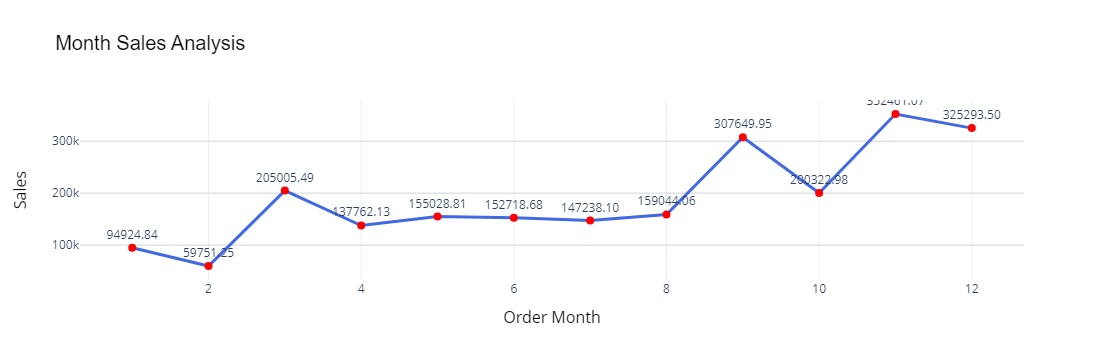

In [25]:
fig = px.line(sales_by_month,
              x='Order Month',
              y='Sales',
              title='Month Sales Analysis',
              text=sales_by_month['Sales'].apply(lambda x: f"{x:.2f}"))  

fig.update_traces(
    line=dict(color='royalblue', width=3),  
    marker=dict(size=8, color='red'),  
    textposition='top center',  
    texttemplate='%{text}'  
)

fig.update_layout(
    title=dict(font=dict(size=20, family='Arial', color='black')), 
    xaxis=dict(title='Order Month', titlefont=dict(size=16, color='black')),  
    yaxis=dict(title='Sales', titlefont=dict(size=16, color='black')),  
    plot_bgcolor='white',  
    xaxis_showgrid=True, 
    yaxis_showgrid=True, 
    yaxis_gridcolor='lightgray' 
)

fig.show()

## Sales by Category

In [26]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

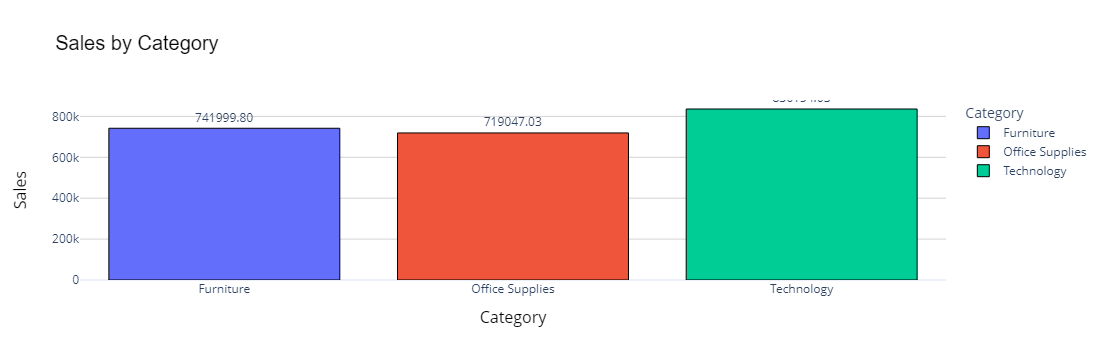

In [33]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

fig = px.bar(sales_by_category, 
             x='Category', 
             y='Sales', 
             title='Sales by Category', 
             text=sales_by_category['Sales'].apply(lambda x: f"{x:.2f}"), 
             color='Category')

fig.update_traces(
    textposition='outside', 
    texttemplate='%{text}', 
    marker=dict(line=dict(color='black', width=1))
)

fig.update_layout(
    title=dict(font=dict(size=20, family='Arial', color='black')),
    xaxis=dict(title='Category', titlefont=dict(size=16, color='black')),
    yaxis=dict(title='Sales', titlefont=dict(size=16, color='black')),
    plot_bgcolor='white',
    xaxis_showgrid=False, 
    yaxis_showgrid=True, 
    yaxis_gridcolor='lightgray'
)

fig.show()


## sales by subcategory

In [34]:
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()

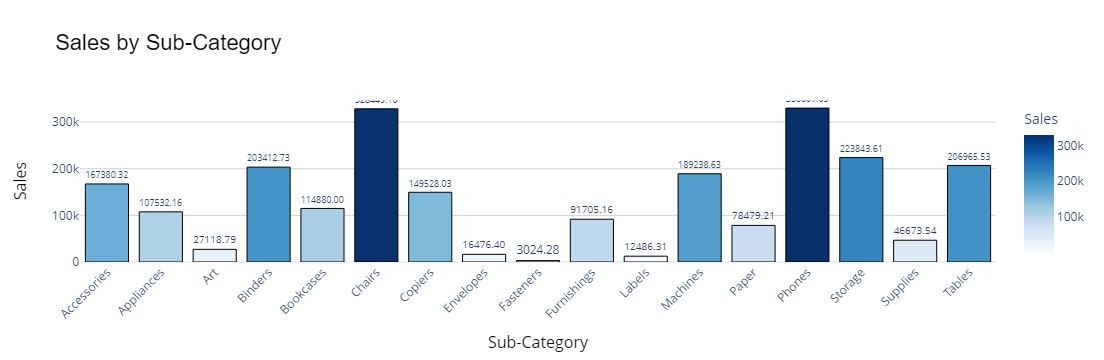

In [36]:
fig = px.bar(sales_by_subcategory, 
             x='Sub-Category', 
             y='Sales', 
             title='Sales by Sub-Category', 
             text=sales_by_subcategory['Sales'].apply(lambda x: f"{x:.2f}"), 
             color='Sales', 
             color_continuous_scale='blues')

fig.update_traces(
    textposition='outside', 
    texttemplate='%{text}', 
    marker=dict(line=dict(color='black', width=1))
)

fig.update_layout(
    title=dict(font=dict(size=22, family='Arial', color='black')),
    xaxis=dict(title='Sub-Category', titlefont=dict(size=16, color='black'), tickangle=-45),
    yaxis=dict(title='Sales', titlefont=dict(size=16, color='black')),
    plot_bgcolor='white',
    xaxis_showgrid=False, 
    yaxis_showgrid=True, 
    yaxis_gridcolor='lightgray'
)

fig.show()



## Monthly Profit

In [37]:
monthly_profit = data.groupby('Order Month')['Profit'].sum().reset_index()

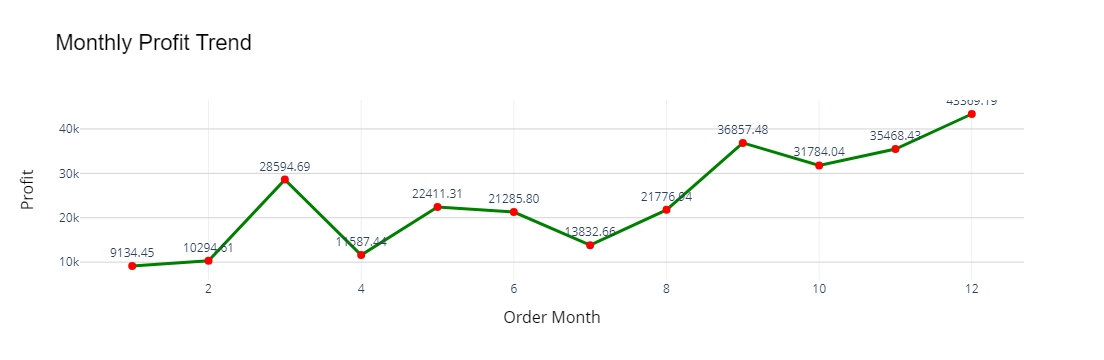

In [38]:
fig = px.line(monthly_profit, 
              x='Order Month', 
              y='Profit', 
              title='Monthly Profit Trend', 
              text=monthly_profit['Profit'].apply(lambda x: f"{x:.2f}"))

fig.update_traces(
    line=dict(color='green', width=3), 
    marker=dict(size=8, color='red'), 
    textposition='top center', 
    texttemplate='%{text}'
)

fig.update_layout(
    title=dict(font=dict(size=22, family='Arial', color='black')),
    xaxis=dict(title='Order Month', titlefont=dict(size=16, color='black')), 
    yaxis=dict(title='Profit', titlefont=dict(size=16, color='black')), 
    plot_bgcolor='white',
    xaxis_showgrid=True, 
    yaxis_showgrid=True, 
    yaxis_gridcolor='lightgray'
)

fig.show()


## Profit by Category

In [49]:
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

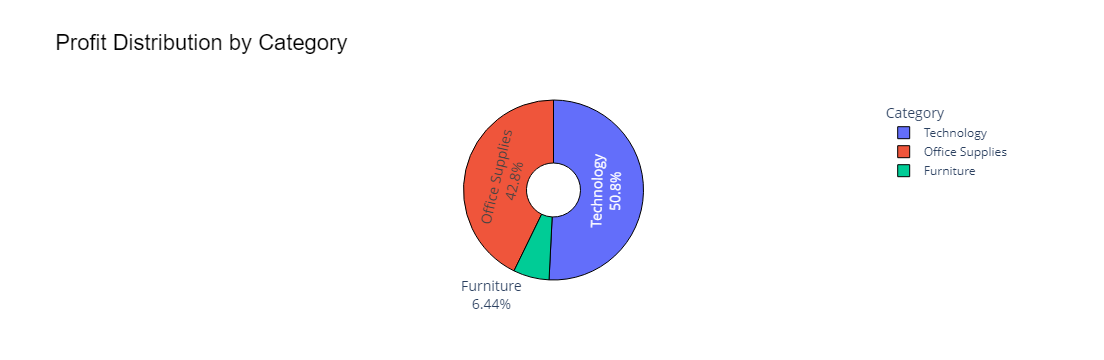

In [52]:
fig = px.pie(profit_by_category, 
             names='Category', 
             values='Profit', 
             title='Profit Distribution by Category', 
             hole=0.3, 
             hover_data={'Profit': ':.2f'}, 
             labels={'Profit': 'Total Profit'})

fig.update_traces(
    textinfo='percent+label', 
    textfont_size=14, 
    marker=dict(line=dict(color='black', width=1))
)

fig.update_layout(
    title=dict(font=dict(size=22, family='Arial', color='black')),
    showlegend=True, 
    legend_title_text='Category',
    plot_bgcolor='white'
)

fig.show()


## Profit by sub-Category

In [53]:
profit_by_sub_category = data.groupby('Sub-Category')['Profit'].sum().reset_index()

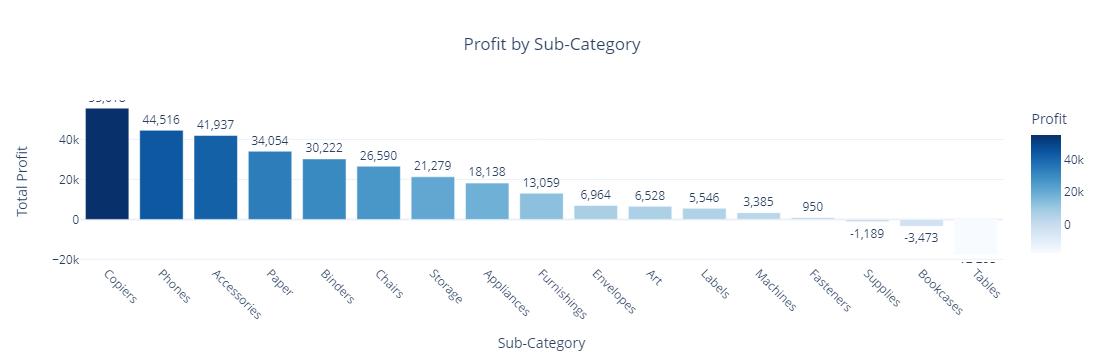

In [54]:
fig = px.bar(profit_by_sub_category,
             x='Sub-Category',
             y='Profit',
             title='Profit by Sub-Category',
             text='Profit',
             color='Profit',
             color_continuous_scale='Blues')

fig.update_layout(
    xaxis_title='Sub-Category',
    yaxis_title='Total Profit',
    xaxis={'categoryorder':'total descending'},
    hovermode='x',
    title_x=0.5
)

fig.update_traces(texttemplate='%{text:,.0f}',
                  textposition='outside')

fig.update_xaxes(tickangle=45)

fig.show()

## sales and profit by customer segment

In [55]:
sales_and_profit_by_customer_segment = data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()

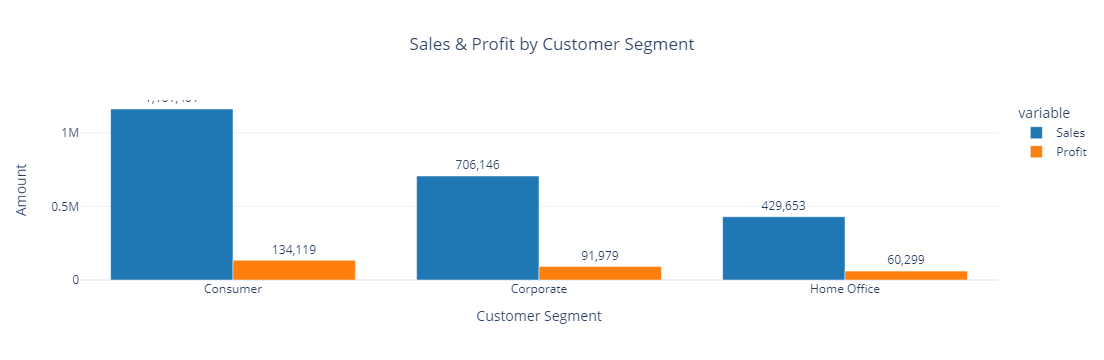

In [56]:
fig = px.bar(sales_and_profit_by_customer_segment,
             x='Segment',
             y=['Sales', 'Profit'],
             title='Sales & Profit by Customer Segment',
             barmode='group',
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])

fig.update_layout(
    yaxis_title='Amount',
    xaxis_title='Customer Segment',
    hovermode='x unified',
    title_x=0.5
)

fig.update_traces(texttemplate='%{y:,.0f}',
                 textposition='outside')

fig.show()

## sales to profit ratio

In [57]:
sales_and_profit_by_customer_segment = data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
sales_and_profit_by_customer_segment['Sales_to_profit_ratio'] = sales_and_profit_by_customer_segment['Sales'] / sales_and_profit_by_customer_segment['Profit']
print(sales_and_profit_by_customer_segment[['Segment','Sales_to_profit_ratio']])

       Segment  Sales_to_profit_ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
